## Financial Analysis of Hewlett Packard(HPQ)-
HP Inc. (formerly an acronym for Hewlett-Packard) is an American multinational information technology company headquartered in Palo Alto, California, that develops personal computers (PCs), printers and related supplies, as well as 3D printing solutions.

In [2]:
import pandas as pd
import numpy as np 
import yfinance as yf
import datetime
import scipy.optimize as sco
from scipy import stats

import matplotlib.pyplot as plt
from matplotlib import dates

import seaborn as sns

import plotly.io as pio
import plotly.express as px
plt.style.use('fivethirtyeight')

In [3]:
raw = yf.download('SPY HPQ', start = '2020-01-01', end = '2023-7-17')
raw

def fix_cols(df):
    columns = df.columns
    outer = [col[0] for col in columns]      # using a list comprehension to extract the first entry for each tuple in 
    df.columns = outer                       # the multi-index from .columns ^above^
    return df                                        

(raw
 .iloc[:, ::2]
 .pipe(fix_cols)
)

def tweak_data():
    raw = yf.download('SPY HPQ', start = '2020-01-01', end = '2023-7-17')
                    
    return(raw
     .iloc[:, :-2:2] # :-2:2 takes out volume, ::2 leaves volume in
     .pipe(fix_cols)
)
                      
tweak_data()


# TO define hpq data
hpq = (raw
        .iloc[:,::2]
        .pipe(fix_cols))
hpq

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-02,18.590282,20.790001,20.830000,20.650000,20.680000,7194700
2020-01-03,18.357790,20.530001,20.680000,20.450001,20.480000,5421800
2020-01-06,18.429327,20.610001,20.790001,20.510000,20.660000,9312500
2020-01-07,18.474039,20.660000,20.780001,20.510000,20.559999,6536200
2020-01-08,18.715469,20.930000,20.990000,20.530001,20.530001,7780100
...,...,...,...,...,...,...
2023-07-10,31.540001,31.540001,31.540001,31.030001,31.129999,5394600
2023-07-11,33.450001,33.450001,33.740002,32.290001,32.470001,13731700
2023-07-12,32.900002,32.900002,33.900002,32.889999,33.779999,7828300


In [4]:
# Making an hpq variable so we dont have to keep retyping

hpq = (raw
        .iloc[:,::2]
        .pipe(fix_cols))
hpq

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-02,18.590282,20.790001,20.830000,20.650000,20.680000,7194700
2020-01-03,18.357790,20.530001,20.680000,20.450001,20.480000,5421800
2020-01-06,18.429327,20.610001,20.790001,20.510000,20.660000,9312500
2020-01-07,18.474039,20.660000,20.780001,20.510000,20.559999,6536200
2020-01-08,18.715469,20.930000,20.990000,20.530001,20.530001,7780100
...,...,...,...,...,...,...
2023-07-10,31.540001,31.540001,31.540001,31.030001,31.129999,5394600
2023-07-11,33.450001,33.450001,33.740002,32.290001,32.470001,13731700
2023-07-12,32.900002,32.900002,33.900002,32.889999,33.779999,7828300


In [5]:
# returns
# each days price divided by the previous days price

hpq.pct_change()


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.012506,-0.012506,-0.007201,-0.009685,-0.009671,-0.246418
2020-01-06,0.003897,0.003897,0.005319,0.002934,0.008789,0.717603
2020-01-07,0.002426,0.002426,-0.000481,0.000000,-0.004840,-0.298126
2020-01-08,0.013069,0.013069,0.010106,0.000975,-0.001459,0.190309
...,...,...,...,...,...,...
2023-07-10,0.013171,0.013171,0.004139,0.002585,0.004518,-0.308039
2023-07-11,0.060558,0.060558,0.069753,0.040606,0.043045,1.545453
2023-07-12,-0.016442,-0.016442,0.004742,0.018582,0.040345,-0.429910


<AxesSubplot:xlabel='Date'>

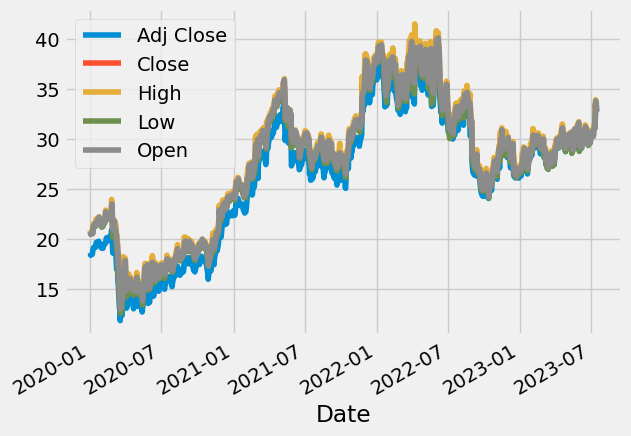

In [6]:
(raw
.iloc[:, :-2:2]
.pipe(fix_cols)
.plot()
)

# Date will be along the x-axis

In [7]:
(raw
 .iloc[:, ::2])

,Adj Close,Close,High,Low,Open,Volume
,HPQ,HPQ,HPQ,HPQ,HPQ,HPQ
Date,,,,,,
2020-01-02,18.590282,20.790001,20.830000,20.650000,20.680000,7194700
2020-01-03,18.357790,20.530001,20.680000,20.450001,20.480000,5421800
2020-01-06,18.429327,20.610001,20.790001,20.510000,20.660000,9312500
2020-01-07,18.474039,20.660000,20.780001,20.510000,20.559999,6536200
2020-01-08,18.715469,20.930000,20.990000,20.530001,20.530001,7780100
...,...,...,...,...,...,...
2023-07-10,31.540001,31.540001,31.540001,31.030001,31.129999,5394600
2023-07-11,33.450001,33.450001,33.740002,32.290001,32.470001,13731700


<AxesSubplot:xlabel='Date'>

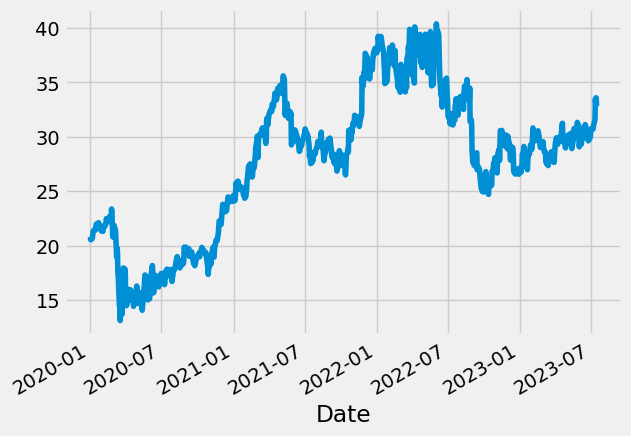

In [8]:
# These are chains
# .iloc selects rows and colums based on their position
#  .iloc(rows, columns)
#  .iloc[ : , : : 2]
    #(row slice)-means every row
    #  , : : 2] - means every column, with a stride of 2. from 1st to last column, every other column(to skip SPY)
# .Close is to pull off the close column so that it gives us just a single line


(raw
 .iloc[:, ::2]
 .pipe(fix_cols)
 .Close
 .plot()
)

<AxesSubplot:xlabel='Date'>

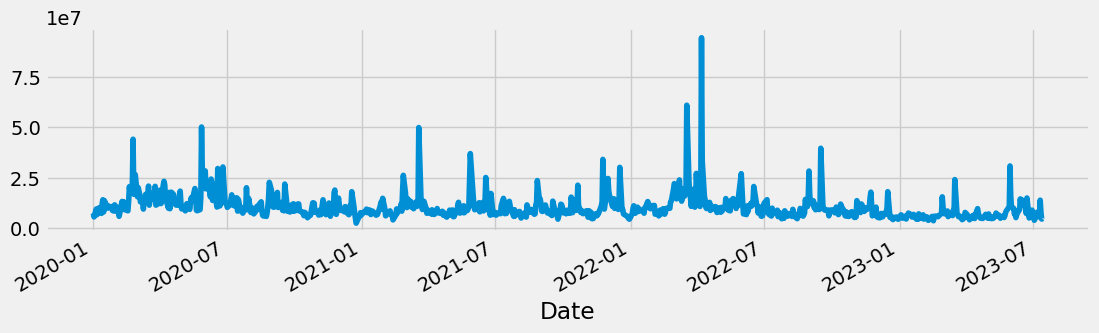

In [10]:
(raw
 .iloc[:, ::2]
 .pipe(fix_cols)
 .Volume
 .plot(figsize=(12,3))
)

# pulling off volume column instead of close column
# fig size makes plot 10 inches wide and 2 inches tall

In [11]:
# Each row is a single daily value
(raw
 .iloc[:, ::2]
 .pipe(fix_cols)
 .Close
)

Date
2020-01-02    20.790001
2020-01-03    20.530001
2020-01-06    20.610001
2020-01-07    20.660000
2020-01-08    20.930000
                ...    
2023-07-10    31.540001
2023-07-11    33.450001
2023-07-12    32.900002
2023-07-13    33.560001
2023-07-14    32.790001
Name: Close, Length: 889, dtype: float64

In [13]:
# you must call an aggregation method

(raw
 .iloc[:, ::2] # Taking every other column to obtain AAPL data
 .pipe(fix_cols) # calling fix_cols function to collapse hierarchical columns
 .resample('M') # offset alias. In this case 'M' means monthly... every 2 months= '2M'
                # quarterly = 'Q'
 .Close
 .mean()
)

# Will return the average, or, mean closing values for each of the months

Date
2020-01-31    21.406190
2020-02-29    22.117895
2020-03-31    17.492273
2020-04-30    15.255714
2020-05-31    15.603500
2020-06-30    16.749091
2020-07-31    17.308182
2020-08-31    18.452857
2020-09-30    19.023333
2020-10-31    19.012273
2020-11-30    20.139000
2020-12-31    23.742273
2021-01-31    25.140527
2021-02-28    26.825789
2021-03-31    30.265217
2021-04-30    33.431905
2021-05-31    32.904500
2021-06-30    29.702727
2021-07-31    28.876191
2021-08-31    29.160909
2021-09-30    28.134762
2021-10-31    28.712381
2021-11-30    32.232857
2021-12-31    36.959091
2022-01-31    37.347500
2022-02-28    36.722632
2022-03-31    36.737391
2022-04-30    37.445500
2022-05-31    36.977143
2022-06-30    35.729524
2022-07-31    32.087500
2022-08-31    33.256522
2022-09-30    26.620000
2022-10-31    26.230952
2022-11-30    29.092857
2022-12-31    27.721429
2023-01-31    28.222000
2023-02-28    29.875790
2023-03-31    28.163043
2023-04-30    29.778421
2023-05-31    30.106364
2023-06-30 

<AxesSubplot:xlabel='Date'>

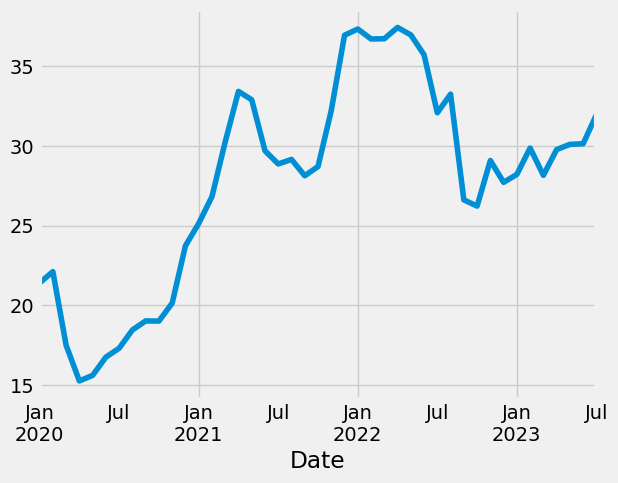

In [14]:
(raw
 .iloc[:, ::2] # Taking every other column to obtain HPQ data
 .pipe(fix_cols) # calling fix_cols function to collapse hierarchical columns
 .resample('M') # offset alias. In this case 'M' means monthly
 .Close
 .mean() # used as an aggregation method (for the actual values to be plotted)(avg monthly close every month)
 .plot()
)

,Open,High,Low,Close
Date,,,,
2020-01-05,20.680000,20.830000,20.450001,20.530001
2020-01-12,20.660000,21.540001,20.510000,21.379999
2020-01-19,21.459999,21.980000,21.260000,21.969999
2020-01-26,21.920000,22.200001,21.530001,21.980000
2020-02-02,21.629999,21.910000,21.160000,21.320000
...,...,...,...,...
2023-06-18,29.950001,31.379999,29.889999,31.000000
2023-06-25,30.809999,30.879999,29.320000,29.610001
2023-07-02,29.780001,30.780001,29.540001,30.709999


Locator attempting to generate 1417 ticks ([18202.0, ..., 19618.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1417 ticks ([18202.0, ..., 19618.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1417 ticks ([18202.0, ..., 19618.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1417 ticks ([18202.0, ..., 19618.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1417 ticks ([18202.0, ..., 19618.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1417 ticks ([18202.0, ..., 19618.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1417 ticks ([18202.0, ..., 19618.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1417 ticks ([18202.0, ..., 19618.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1417 ticks ([18202.0, ..., 19618.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to genera

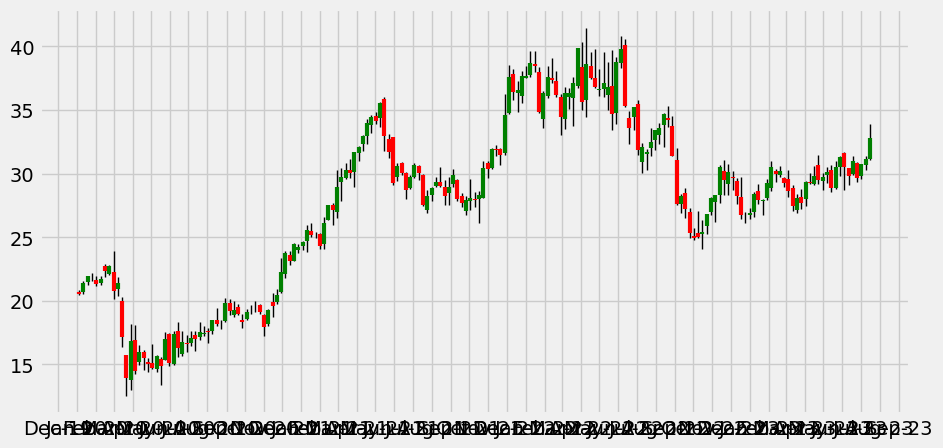

In [16]:
# Making a candlestick plot using pandas as a matplotlib

fig, ax = plt.subplots(figsize=(10,5))
def plot_candle(df, ax):
    #wick
    ax.vlines(x=df.index, ymin=df.Low, ymax=df.High, colors = 'k', linewidth = 1)
    # red - decrease
    red = df.query('Open > Close')
    ax.vlines(x = red.index, ymin = red.Close, ymax = red.Open, colors = 'r', linewidth = 3)
    # green - increase
    green = df.query('Open <= Close')
    ax.vlines(x = green.index, ymin = green.Close, ymax = green.Open, colors = 'g', linewidth = 3)
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y'))
    ax.xaxis.set_minor_locator(dates.DayLocator())
    return df
    
    
(raw
 .iloc[:, ::2]
 .pipe(fix_cols)
 .resample('W')
 .agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last'})
 .loc['jan 2020':'jul 2023']
 .pipe(plot_candle, ax)
)

<AxesSubplot:xlabel='Date'>

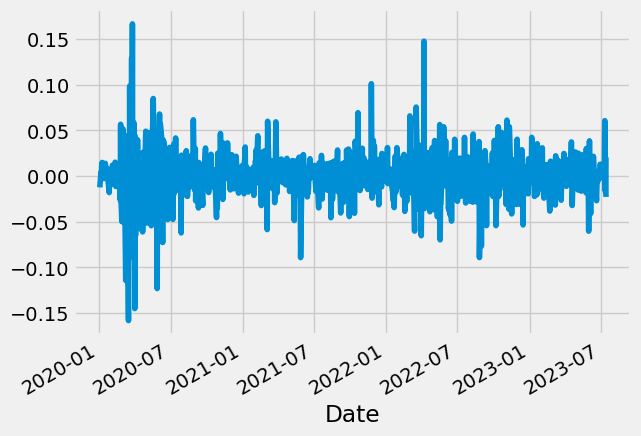

In [17]:
# Plot Returns

(hpq
 .pct_change()
 .Close
 .plot()
)

<AxesSubplot:>

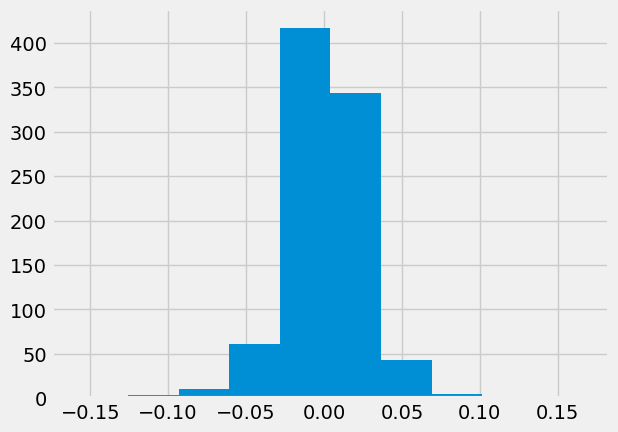

In [18]:
# Histogram of Returns
(hpq
 .pct_change()
 .Close
 .hist()
)

<AxesSubplot:>

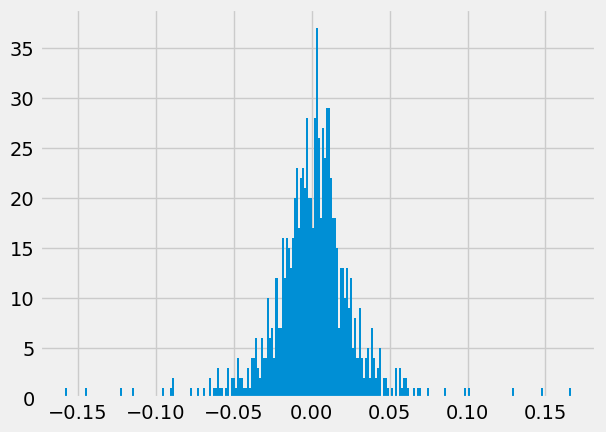

In [19]:
# Change bins
(hpq
 .pct_change()
 .Close
 .hist(bins=250)
)

Date
2023-02-21   -0.038462
2023-02-22    0.002759
2023-02-23    0.016162
2023-02-24   -0.011168
2023-02-27    0.005818
                ...   
2023-07-10    0.013171
2023-07-11    0.060558
2023-07-12   -0.016442
2023-07-13    0.020061
2023-07-14   -0.022944
Name: Close, Length: 100, dtype: float64

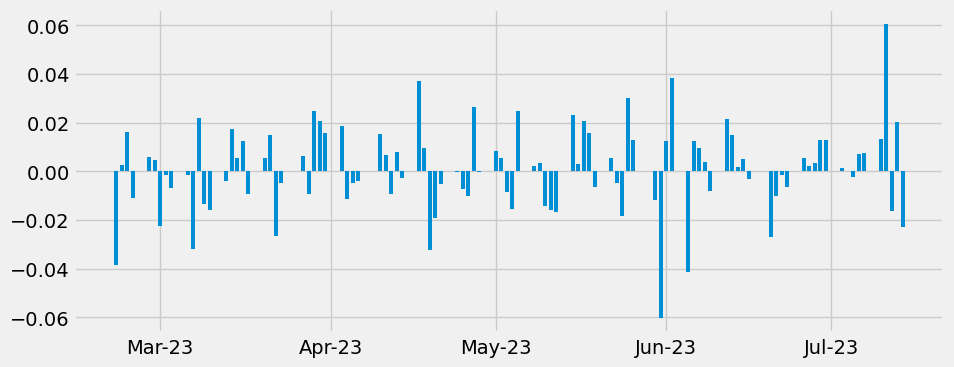

In [20]:
# Returns using matplotlib

def my_bar(ser, ax):
    ax.bar(ser.index, ser)
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y'))
    ax.xaxis.set_minor_locator(dates.DayLocator())
    return ser



fig,ax = plt.subplots(figsize=(10,4))
(hpq
 .pct_change()
 .Close
 .iloc[-100:]
 .pipe(my_bar, ax)
)


<AxesSubplot:xlabel='Date'>

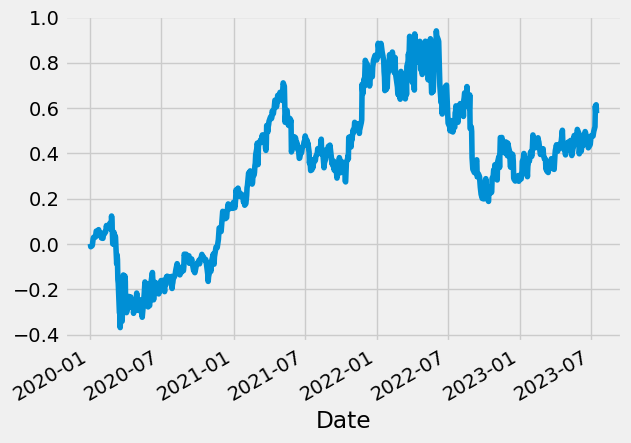

In [22]:
(hpq
 .Close
 .sub(hpq.Close[0]) # subtract the 1st value from Close
 .div(hpq.Close[0]) # dividing by the first value
 .plot()
)

# 8.5% return over the decade of data

<AxesSubplot:xlabel='Date'>

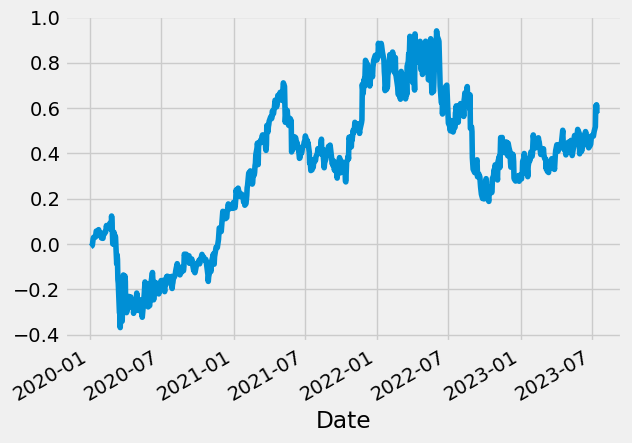

In [24]:
# Alternate Calculation

(hpq
 .Close
 .pct_change()
 .add(1)
 .cumprod()
 .sub(1)
 .plot()
)

<AxesSubplot:xlabel='Date'>

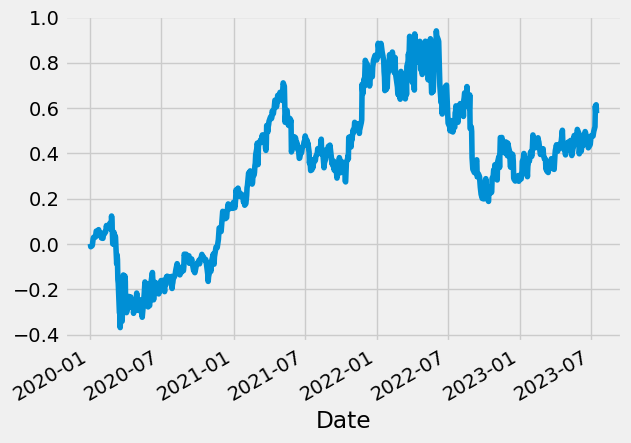

In [26]:
# Create a function for calculating
def calc_cum_returns(df, col):
    ser = df[col]
    return (ser
            .sub(ser[0])
            .div(ser[0])
           )

(hpq
 .pipe(calc_cum_returns, 'Close')
 .plot()
)

In [29]:
def get_returns(df):
    return calc_cum_returns(df, 'Close')

get_returns(hpq)


Date
2020-01-02    0.000000
2020-01-03   -0.012506
2020-01-06   -0.008658
2020-01-07   -0.006253
2020-01-08    0.006734
                ...   
2023-07-10    0.517075
2023-07-11    0.608947
2023-07-12    0.582492
2023-07-13    0.614238
2023-07-14    0.577201
Name: Close, Length: 889, dtype: float64

In [31]:
(lambda df: get_returns(df))(hpq)

Date
2020-01-02    0.000000
2020-01-03   -0.012506
2020-01-06   -0.008658
2020-01-07   -0.006253
2020-01-08    0.006734
                ...   
2023-07-10    0.517075
2023-07-11    0.608947
2023-07-12    0.582492
2023-07-13    0.614238
2023-07-14    0.577201
Name: Close, Length: 889, dtype: float64

In [33]:
(hpq
 .assign(cum_returns=lambda df: calc_cum_returns(df, 'Close')) # to add cumulative returns 
)

,Adj Close,Close,High,Low,Open,Volume,cum_returns
Date,,,,,,,
2020-01-02,18.590282,20.790001,20.830000,20.650000,20.680000,7194700,0.000000
2020-01-03,18.357790,20.530001,20.680000,20.450001,20.480000,5421800,-0.012506
2020-01-06,18.429327,20.610001,20.790001,20.510000,20.660000,9312500,-0.008658
2020-01-07,18.474039,20.660000,20.780001,20.510000,20.559999,6536200,-0.006253
2020-01-08,18.715469,20.930000,20.990000,20.530001,20.530001,7780100,0.006734
...,...,...,...,...,...,...,...
2023-07-10,31.540001,31.540001,31.540001,31.030001,31.129999,5394600,0.517075
2023-07-11,33.450001,33.450001,33.740002,32.290001,32.470001,13731700,0.608947
2023-07-12,32.900002,32.900002,33.900002,32.889999,33.779999,7828300,0.582492


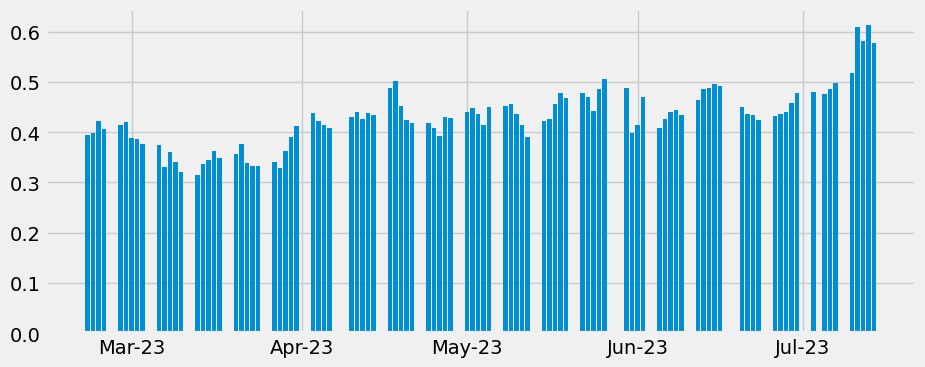

In [34]:
# To visualize

def my_bar(ser, ax):
    ax.bar(ser.index, ser)
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y'))
    ax.xaxis.set_minor_locator(dates.DayLocator())
    return ser

fix, ax = plt.subplots(figsize=(10,4))
_ = (hpq
    .pipe(calc_cum_returns, 'Close')
    .iloc[-100:]
    .pipe(my_bar, ax)
    )

## Volatility

In [35]:
# To take the mean of the 'Close' Column

(hpq
 .Close
 .mean()
)

27.67065240347211

In [36]:
(hpq
 .Close
 .std()
)

6.6020607210588045

In [37]:
# Creating a new column called 'pct_change_close' which takes the %Change. THEN taking std of that columns values

(hpq
 .assign(pct_change_close=hpq.Close.pct_change())
 .pct_change_close
 .std()
)

0.026293326289244082

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

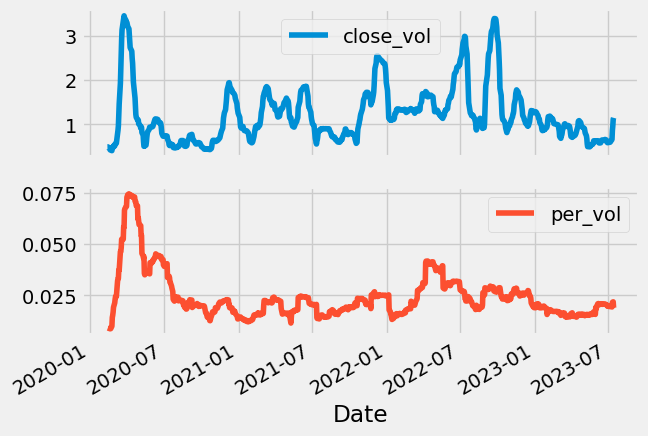

In [38]:
(hpq
 .assign(close_vol = hpq.rolling(30).Close.std(), # taking a std of the close values of the previous 30 days
         per_vol = hpq.Close.pct_change().rolling(30).std()) # The std of the %changes in the close values
 .iloc[ : , -2:] # all rows, *2 from end(close_vol)---> last 2 columns
 .plot(subplots = True)
)

In [39]:
(hpq
 .assign(pct_change_close = hpq.Close.pct_change())
 .resample('15D')
 .std()
)

,Adj Close,Close,High,Low,Open,Volume,pct_change_close
Date,,,,,,,
2020-01-02,0.360848,0.403545,0.392690,0.384845,0.416160,2.502530e+06,0.008130
2020-01-17,0.245183,0.274194,0.216117,0.238703,0.265349,1.554967e+06,0.009476
2020-02-01,0.337485,0.377418,0.408658,0.361154,0.397291,2.289853e+06,0.008461
2020-02-16,0.637095,0.712480,0.732734,0.779569,0.682644,1.011842e+07,0.031899
2020-03-02,2.036526,2.334323,1.929842,2.260440,1.833564,2.892658e+06,0.068519
...,...,...,...,...,...,...,...
2023-05-01,0.423598,0.427290,0.428473,0.476487,0.496000,9.016239e+05,0.015186
2023-05-16,0.474645,0.478782,0.488044,0.445825,0.548408,1.799460e+06,0.015279
2023-05-31,0.714352,0.639043,0.399909,0.615435,0.538290,7.211516e+06,0.028256


In [41]:
(hpq
 .assign(pct_change_close = hpq.Close.pct_change())
 .rolling(window = 15, min_periods = 15)
 .std()
)

,Adj Close,Close,High,Low,Open,Volume,pct_change_close
Date,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2023-07-10,0.598343,0.598343,0.590729,0.572129,0.569701,3.364532e+06,0.010484
2023-07-11,0.983962,0.983962,1.001695,0.790637,0.769442,3.335450e+06,0.018513
2023-07-12,1.144907,1.144907,1.294212,1.049033,1.164369,3.151142e+06,0.017352


<AxesSubplot:xlabel='Date'>

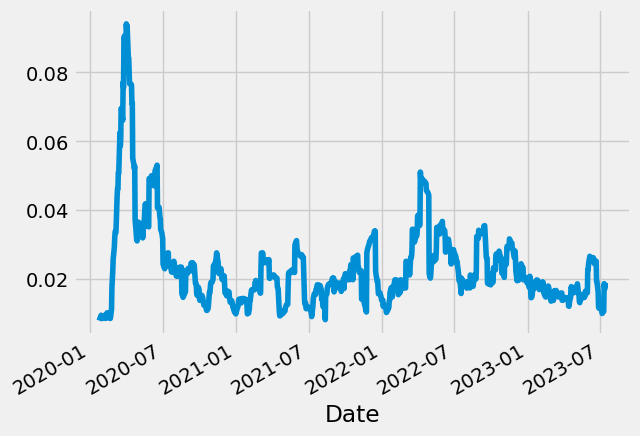

In [43]:
## Note: if column name conflicts with method we need to use index access ([])

(hpq
 .assign(pct_change = hpq.Close.pct_change())
 .rolling(window = 15, min_periods = 15)
 .std()
 ['pct_change']
 .plot()
)

<AxesSubplot:xlabel='Date'>

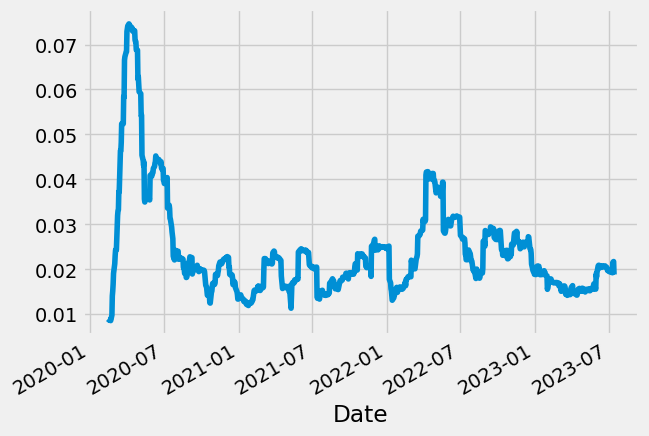

In [45]:
## Plot the rolling volatility over 30-day sliding windows for 2020-2023 for HPQ

(hpq
 .assign(pct_change=hpq.Close.pct_change())
 .rolling(30, min_periods=30)
 .pct_change
 .std()
 .loc['2020' : '2023']
 .plot()
)

## Creating Moving Averages


In [46]:
(hpq
 .assign(s1 = hpq.Close.shift(1),
         s2 = hpq.Close.shift(2),
         ma3 = lambda df_:df_.loc[:,['Close', 's1', 's2']].mean(axis = 'columns'),
         ma3_builtin = hpq.Close.rolling(3).mean()
        )
)

# .mean(axis = 'columns'), index(columns) is the default. Here, we are taking mean across 
# the rows 'Close', 's1', and 's2' ---> Close + s1 + s2 = ma3

# The last 2 lines of code are alternative ways to do the same thing. the last row is a built-in function within Pandas
# The built-in function will not give you a value if it does not have all 3 components of the desired average.

# shift(1) shifts the value from 'close' on day 1 and shifts it down so it aligns with day 2..ALL IN ANOTHER COLUMN. 
# IT DOES NOT SHIFT THE ORIGINAL COLUMN. ADDS A NEW ONE AND SHIFTS THAT

,Adj Close,Close,High,Low,Open,Volume,s1,s2,ma3,ma3_builtin
Date,,,,,,,,,,
2020-01-02,18.590282,20.790001,20.830000,20.650000,20.680000,7194700,NaN,NaN,20.790001,NaN
2020-01-03,18.357790,20.530001,20.680000,20.450001,20.480000,5421800,20.790001,NaN,20.660001,NaN
2020-01-06,18.429327,20.610001,20.790001,20.510000,20.660000,9312500,20.530001,20.790001,20.643334,20.643334
2020-01-07,18.474039,20.660000,20.780001,20.510000,20.559999,6536200,20.610001,20.530001,20.600000,20.600000
2020-01-08,18.715469,20.930000,20.990000,20.530001,20.530001,7780100,20.660000,20.610001,20.733334,20.733334
...,...,...,...,...,...,...,...,...,...,...
2023-07-10,31.540001,31.540001,31.540001,31.030001,31.129999,5394600,31.129999,30.900000,31.190000,31.190000
2023-07-11,33.450001,33.450001,33.740002,32.290001,32.470001,13731700,31.540001,31.129999,32.040000,32.040000
2023-07-12,32.900002,32.900002,33.900002,32.889999,33.779999,7828300,33.450001,31.540001,32.630001,32.630001


In [47]:
# Plotting MA

(hpq
 .assign(s1 = hpq.Close.shift(1),
         s2 = hpq.Close.shift(2),
         ma3 = lambda df_:df_.loc[:,['Close', 's1', 's2']].mean(axis = 'columns'),
         ma3_builtin = hpq.Close.rolling(3).mean()
        )
)

,Adj Close,Close,High,Low,Open,Volume,s1,s2,ma3,ma3_builtin
Date,,,,,,,,,,
2020-01-02,18.590282,20.790001,20.830000,20.650000,20.680000,7194700,NaN,NaN,20.790001,NaN
2020-01-03,18.357790,20.530001,20.680000,20.450001,20.480000,5421800,20.790001,NaN,20.660001,NaN
2020-01-06,18.429327,20.610001,20.790001,20.510000,20.660000,9312500,20.530001,20.790001,20.643334,20.643334
2020-01-07,18.474039,20.660000,20.780001,20.510000,20.559999,6536200,20.610001,20.530001,20.600000,20.600000
2020-01-08,18.715469,20.930000,20.990000,20.530001,20.530001,7780100,20.660000,20.610001,20.733334,20.733334
...,...,...,...,...,...,...,...,...,...,...
2023-07-10,31.540001,31.540001,31.540001,31.030001,31.129999,5394600,31.129999,30.900000,31.190000,31.190000
2023-07-11,33.450001,33.450001,33.740002,32.290001,32.470001,13731700,31.540001,31.129999,32.040000,32.040000
2023-07-12,32.900002,32.900002,33.900002,32.889999,33.779999,7828300,33.450001,31.540001,32.630001,32.630001


<AxesSubplot:xlabel='Date'>

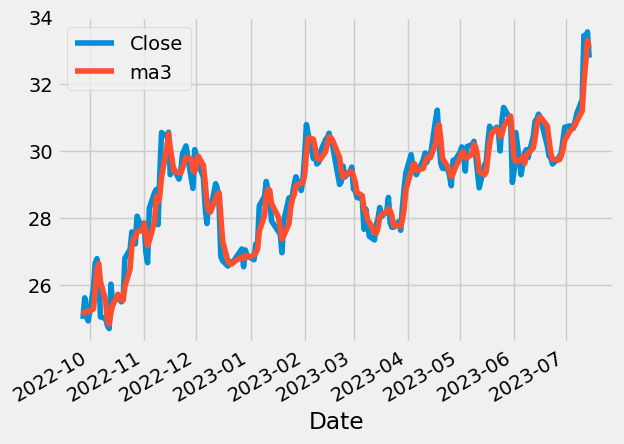

In [48]:
(hpq
 .assign(s1 = hpq.Close.shift(1),
         s2 = hpq.Close.shift(2),
         ma3 = lambda df_:df_.loc[:,['Close', 's1', 's2']].mean(axis = 'columns'),
         ma3_builtin = hpq.Close.rolling(3).mean()
        )
 [['Close', 'ma3']] # to select only 'Close' and 'ma3'
 .iloc[-200:]       # to begin 200 values from the last value and work through the last value
 .plot()
)

## Golden Cross


<AxesSubplot:xlabel='Date'>

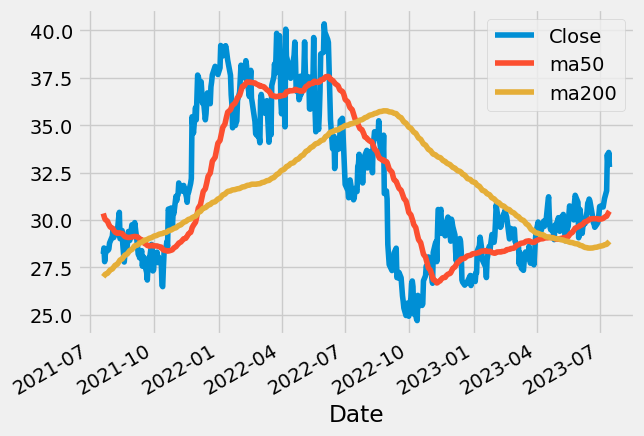

In [49]:
(hpq
 .assign(
     ma50  = hpq.Close.rolling(50).mean(),
     ma200 = hpq.Close.rolling(200).mean(),
 )
 [['Close', 'ma50', 'ma200']] # Passing a list through the index operation will pull the desired columns
 .iloc[-500:]
 .plot()
)

## Accumulation/Distribution Indicator (A/D)

In [50]:
(hpq
 .assign(mfm=((hpq.Close - hpq.Low) - (hpq.High - hpq.Close))/(hpq.High - hpq.Low),
         mfv = lambda df_:df_.mfm * df_.Volume,
         cmfv = lambda df_:df_.mfv.cumsum())
)

#cmfv is the A/D column

,Adj Close,Close,High,Low,Open,Volume,mfm,mfv,cmfv
Date,,,,,,,,,
2020-01-02,18.590282,20.790001,20.830000,20.650000,20.680000,7194700,0.555567,3.997140e+06,3.997140e+06
2020-01-03,18.357790,20.530001,20.680000,20.450001,20.480000,5421800,-0.304347,-1.650109e+06,2.347031e+06
2020-01-06,18.429327,20.610001,20.790001,20.510000,20.660000,9312500,-0.285713,-2.660705e+06,-3.136741e+05
2020-01-07,18.474039,20.660000,20.780001,20.510000,20.559999,6536200,0.111106,7.262137e+05,4.125396e+05
2020-01-08,18.715469,20.930000,20.990000,20.530001,20.530001,7780100,0.739132,5.750523e+06,6.163062e+06
...,...,...,...,...,...,...,...,...,...
2023-07-10,31.540001,31.540001,31.540001,31.030001,31.129999,5394600,1.000000,5.394600e+06,1.158215e+07
2023-07-11,33.450001,33.450001,33.740002,32.290001,32.470001,13731700,0.599999,8.239006e+06,1.982116e+07
2023-07-12,32.900002,32.900002,33.900002,32.889999,33.779999,7828300,-0.980194,-7.673251e+06,1.214790e+07


<AxesSubplot:xlabel='Date'>

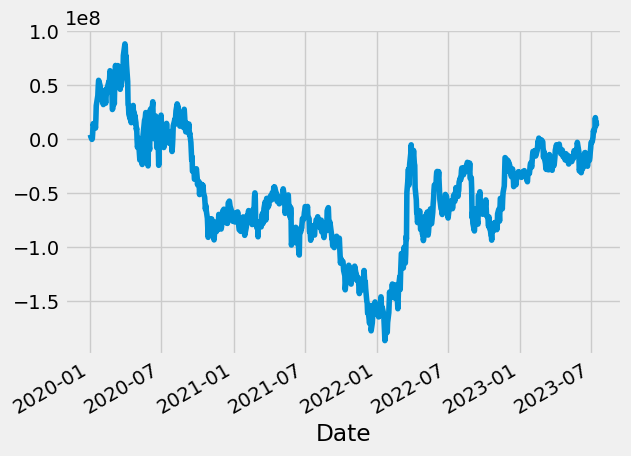

In [51]:
# Now refactoring into a function called 'calc_ad'

def calc_ad(df, close_col='Close', low_col='Low', high_col='High',
            vol_col='Volume'):
    close = df[close_col]
    low = df[low_col]
    high = df[high_col]
    return (df
            .assign(mfm=((close - low) - (high - close)) / (high - low),
                    mfv = lambda df_:df_.mfm * df_[vol_col],  # still using lambda because we need access to the mfm column
                    cmfv = lambda df_:df_.mfv.cumsum())       # these lines are NOT python code, rather they are Pandas
            .cmfv
           )

(hpq
 .assign(ad = calc_ad)
 .ad
 .plot()
)

# ^to plot the new 'ad' column